In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\sandy\AppData\Local\Temp\ipykernel_4048\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#define a function to generate SHAP plot given spectra,shap values and className
def generateSHAPPlot(currentClassMeanSpectra,meanSHAPValues,currentClassName):
    #get the wavelength list
    global wavelengthList
    
    #get the font address
    global fpath
    
    #import pyplot from matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import matplotlib.colors as colors
    #set plot parameters
    plotHeight=5
    plotWidth=10
    mineralTitleFontsize=30
    axisLabelFontsize=30
    noOfWavelengthTicks=10
    wavlengthTicksFontSize=24
    lineWidth=30
    lineWidthSHAP=20
    noOfPlotsPerRow=6
    noOfRows=4

    #set the size of the titles for each plot
    titleSize=80
    labelSize=80
    legendSize=10
    tickLabelSize=60
    colorbarLabelSize=60

    #set the tick labels for the wavelengths labels for the samples spectra plots
    wavlengthTickLabels=[1.0,1.4,1.8,2.2,2.6]
    #set the tick positions for the wavelength labels
    wavelengthTickPositions=np.copy(wavlengthTickLabels)
    wavelengthTickPositions[0]=wavelengthList[0]
    wavelengthTickPositions[-1]=wavelengthList[-1]


    #create the figure
    figure,axes=plt.subplots(nrows=1,
                             ncols=1,
                             figsize=(30,15),
                             dpi=100)

    #compute the range of SHAP values 
    shapUpperBound=np.amax(meanSHAPValues)
    shapLowerBound=np.amin(meanSHAPValues)

    shapUpperBound=shapUpperBound if shapUpperBound>abs(shapLowerBound) else -1*shapLowerBound
    shapLowerBound=shapLowerBound if abs(shapLowerBound)>shapUpperBound else -1*shapUpperBound

    #turn the axis on
    axes.axis('on')

    #get the colors for the the current spectra
    colorSpectra=cm.seismic((meanSHAPValues-shapLowerBound)/(shapUpperBound-shapLowerBound))


    #create colorMap
    sm=plt.cm.ScalarMappable(cmap='seismic')


    #get the number of the sub-plot where the spectra is to be mapped
    plotNumber=i


    #plot the spectra
    axes.plot(wavelengthList,
              currentClassMeanSpectra,
              lw=lineWidth,
              color='black')

    #get the indices of the spectra sorted in ascending order of SHAP magnitudes
    SHAPMagnitudeIndices=np.argsort(meanSHAPValues)


    #plot the spectra color-coded by SHAP values
    for k in SHAPMagnitudeIndices:
        #skip the list band 
        if k==(wavelengthList.shape[0]-1):
            continue
        im=axes.plot([wavelengthList[k],wavelengthList[k+1]],
                     [currentClassMeanSpectra[k],currentClassMeanSpectra[k+1]],
                     lw=lineWidthSHAP,
                     c=colorSpectra[k])


    #set the y-ticks off for all plots
    [t.set_visible(True) for t in axes.get_yticklabels()]


    #add the name of the mineral class to the title of the plot
    axes.set_title(currentClassName,
                   fontsize=titleSize,font=fpath)


     # set the y-axis label
    axes.set_ylabel("Ratioed CRISM I/F",fontsize=labelSize,font=fpath)


    #get the tick positions for the y-axis
    yTickPositions=np.array([np.amin(currentClassMeanSpectra),np.amax(currentClassMeanSpectra)])

    #get the tick labels for the y-axis
    yTickLabels=np.round(yTickPositions,3)

    #set ticks for the y-axis
    axes.set_yticks(yTickPositions,
                    labels=yTickLabels,
                    fontsize=labelSize,font=fpath)

    # set the x-axis label and wavelength ticks
    axes.set_xlabel("Wavelength in μm",fontsize=labelSize,font=fpath)

    #set ticks for the x-axis
    axes.set_xticks(wavelengthTickPositions,
                    labels=wavlengthTickLabels,
                    fontsize=labelSize,font=fpath)




    #set the margins for all plots
    axes.margins(0.03)

    #add a colorbar
    colorbar=figure.colorbar(sm,ax=axes,ticks=np.arange(0,1.1,0.25))
    #add ticks to the colorbar
    colorbar.ax.tick_params(labelsize=tickLabelSize)
    #calculate labels for th colorbar's ticks
    tickLabels=np.round(np.arange(shapLowerBound,
                                  shapUpperBound+(shapUpperBound-shapLowerBound)/20,
                                  (shapUpperBound-shapLowerBound)/4),
                        3)
    #tickLabels=np.round(tickLabels*100,1)
    tickLabels=np.round(tickLabels,3)
    tickLabels=tickLabels.astype('str')


    #add custom labels to the ticks
    temp=colorbar.ax.set_yticklabels(tickLabels)
    #add the label for the color-bar
    colorbar.set_label("SHAP values",
                       fontsize=colorbarLabelSize,font=fpath)



In [3]:
#define a function to generate SHAP plot given spectra,shap values, className and position of the absorption band centre
def generateSHAPPlotWithBandCentre(currentClassMeanSpectra,classLabel,currentClassBandCentres,rowIndices,colIndices,plotHeight=21,plotWidth=30):
    #get the wavelength list
    global wavelengthList
    #get the mica exemplars
    global micaExemplars
    #get the mineral names
    global mineralNames
    #get the font address
    global fpath
    
    
    
    noOfWavelengthTicks=10
    wavlengthTicksFontSize=24
    lineWidth=10

    #set the size of the titles for each plot
    titleSize=80
    labelSize=80
    legendSize=10
    tickLabelSize=60
    colorbarLabelSize=60

    #set the tick labels for the wavelengths labels for the samples spectra plots
    wavlengthTickLabels=[1.0,1.4,1.8,2.2,2.6]
    #set the tick positions for the wavelength labels
    wavelengthTickPositions=np.copy(wavlengthTickLabels)
    wavelengthTickPositions[0]=wavelengthList[0]
    wavelengthTickPositions[-1]=wavelengthList[-1]

    axes=[0,1]
    #create the figures
    figure,axes[0]=plt.subplots(nrows=1,
                                ncols=1,
                                figsize=(plotWidth,plotHeight/3),
                                dpi=100)
    figure,axes[1]=plt.subplots(nrows=1,
                                ncols=1,
                                figsize=(plotWidth,plotHeight),
                                dpi=100)
    
    #add the name of the mineral class to the title of the MICA plot
    axes[0].set_title(mineralNames[classLabel],
                   fontsize=titleSize,font=fpath)
    
    #turn the axis on
    for i in axes:
        i.axis('on')

    #plot the mica exemplar
    axes[0].plot(wavelengthList,
                 micaExemplars[classLabel,:],
                 lw=lineWidth,
                 color='brown')
    
    #plot the spectra
    if currentClassMeanSpectra.shape[0]==236:
        axes[1].plot(wavelengthList,
                     currentClassMeanSpectra,
                     lw=lineWidth,
                     color='r')
    else:
        colors=['r','g','b']
        for i in range(currentClassMeanSpectra.shape[0]):
            axes[1].plot(wavelengthList,
                         currentClassMeanSpectra[i,:]-0.4*i, #an offset is introduced for clarity
                         lw=lineWidth,
                         color=colors[i],
                         label="("+str(rowIndices[i])+","+str(colIndices[i])+")")
            
        # Create FontProperties object with custom font
        from matplotlib.font_manager import FontProperties
        custom_font=FontProperties(fname=fpath, size=labelSize*0.5)
        #axes[1].legend(fontsize=labelSize*0.5,framealpha=0,prop=custom_font)
        axes[1].legend(framealpha=0,prop=custom_font)


    # set the y-axis label
    axes[0].set_ylabel("Ratioed CRISM I/F",fontsize=labelSize*0.6,font=fpath)
    axes[1].set_ylabel("Ratioed CRISM I/F offset",fontsize=labelSize*0.9,font=fpath)
    

   

    #get the tick positions for the y-axis
    yTickPositions=[]

    #set ticks for the y-axis
    axes[0].set_yticks(yTickPositions,
                    labels=yTickPositions,
                    fontsize=labelSize,font=fpath)
    axes[1].set_yticks(yTickPositions,
                    labels=yTickPositions,
                    fontsize=labelSize,font=fpath)

    # set the x-axis label and wavelength ticks
    for i in axes:
        i.set_xlabel("Wavelength in μm",fontsize=labelSize,font=fpath)

    #set ticks for the x-axis
    for i in axes:
        i.set_xticks(wavelengthTickPositions,
                    labels=wavlengthTickLabels,
                    fontsize=labelSize,font=fpath)
    
    
    #add vertical lines denoting absorption feature
    axes[0].vlines(x=currentClassBandCentres,
                ymin=(np.amin(micaExemplars[classLabel,:])),
                ymax=(np.amax(micaExemplars[classLabel,:])),
                lw=lineWidth,
                ls='dotted',
                color='black')
    if currentClassMeanSpectra.shape[0]==236:
        axes[1].vlines(x=currentClassBandCentres,
                    ymin=(np.amin(currentClassMeanSpectra)),
                    ymax=(np.amax(currentClassMeanSpectra)),
                    lw=lineWidth,
                    ls='dotted',
                    color='black')
    else:
        axes[1].vlines(x=currentClassBandCentres,
                    ymin=(np.amin(currentClassMeanSpectra[-1,:]-0.8*(currentClassMeanSpectra.shape[0]-1))),
                    ymax=(np.amax(currentClassMeanSpectra[0,:])),
                    lw=lineWidth,
                    ls='dotted',
                    color='black')
    
    
    # Create FontProperties object with custom font
    from matplotlib.font_manager import FontProperties
    custom_font=FontProperties(fname=fpath, size=labelSize*0.5)
    axes[1].legend(fontsize=labelSize*0.5,framealpha=0,prop=custom_font,loc='lower left')
    
    #set the margins for all plots
    axes[0].margins(0.01)
    axes[1].margins(0.01)

In [4]:
#import numpy
import numpy as np

In [5]:
#import pandas
import pandas as pd
#read the pickled datafram
pickledDataFrameFileAddress="D:/Mars/MachineLearning/Datasets/ML dataset/ReducedDataset/unified22MineralsinlierTrainingDatatset.pkl"
datasetDataFrame=pd.read_pickle(pickledDataFrameFileAddress)

#retrieve the labels and spectra for hydrated silica
allSpectra=datasetDataFrame['Spectra'].to_numpy()
allSpectra=np.vstack(allSpectra)
allLabels=datasetDataFrame['classLabels'].to_numpy()
allNames=datasetDataFrame['classNames'].to_numpy()
#compute a list containing the labels and names of all minerals
uniqueLabels=np.unique(allLabels)
mineralNames=[]
for i in uniqueLabels:
    mineralNames.append(allNames[np.where(allLabels==i)][0])
mineralNames=np.array(mineralNames)
#remove the used variable from memory
del allNames
del datasetDataFrame
del pickledDataFrameFileAddress
del pd
del allSpectra
del allLabels

In [6]:
#read the wavelengthList
wavelengthListFileAddress="D:/Mars/MachineLearning/Datasets/ML dataset/wavelengthList.npy"
wavelengthList=np.load(wavelengthListFileAddress,allow_pickle=True)
del wavelengthListFileAddress

In [7]:
#set the address of the dictory cantaining the ML tookits datasets
mlToolkitDatasetsDirectory="D:/Mars/MachineLearning/Datasets/ML dataset"

In [8]:
'''</strong>Enter details of the image to be processed</strong>
<ol>
    <li>Address of the TRDR cube to be processed <code>crismDataCubeAddress</code> - similar to the Machine Learning toolkit TRR3 observations are used without applying corrections.</li>
    <li>Address of the standard RGB generated from the TRDR cube <code>fccFileAddress</code> - It is used as a backdrop to display the mineral maps. It must be a png file.</li>
    <li>Address of the .img file where the outputs are to be written <code>outputfileAddress</code> - A 3 band file is needed and must already exist. Using an existing file with requisite header information makes projecting the image later easier</li>
    <li>Address of a file to be created. Information describing the detection made in the image will be saved here <code>detectionDetailsAddress</code> - Need not already exist, new file will be created.</li>
</ol> '''

'</strong>Enter details of the image to be processed</strong>\n<ol>\n    <li>Address of the TRDR cube to be processed <code>crismDataCubeAddress</code> - similar to the Machine Learning toolkit TRR3 observations are used without applying corrections.</li>\n    <li>Address of the standard RGB generated from the TRDR cube <code>fccFileAddress</code> - It is used as a backdrop to display the mineral maps. It must be a png file.</li>\n    <li>Address of the .img file where the outputs are to be written <code>outputfileAddress</code> - A 3 band file is needed and must already exist. Using an existing file with requisite header information makes projecting the image later easier</li>\n    <li>Address of a file to be created. Information describing the detection made in the image will be saved here <code>detectionDetailsAddress</code> - Need not already exist, new file will be created.</li>\n</ol> '

In [9]:
#set the address of the image to be read
crismDataCubeAddress="D:/Mars/MachineLearning/Datasets/CRISMImages/TRDRs/1FD76/frt0001fd76_07_if166l_trr3.img"
#set the address of the fcc of the datacube
fccFileAddress="D:/Mars/MachineLearning/Datasets/CRISMImages/TRDRs/1FD76/frt0001fd76_07_if166l_trr3_CAT_RGBBackground.png"
#set the address of the file where the outputs are to be written
outputfileAddress="D:/Mars/MachineLearning/Datasets/CRISMImages/TRDRs/1FD76/frt0001fd76_07_if166l_trr3_CAT_expMineralMap.img"
#set the address of the pickle file where details of the detections in the current image will be saved
detectionDetailsAddress="D:/Mars/MachineLearning/Datasets/CRISMImages/TRDRs/1FD76/frt0001fd76_07_if166l_trr3_detectionDetails.pkl"
#set the address of the ter image
terDataCubeAddress="D:/Mars/MachineLearning/Datasets/CRISMImages/TERs/1FD76/frt0001fd76_07_if166j_ter3.img"

In [10]:
#import feature masks and script to train the bland pixel identifier
from crism_ml.train import feat_masks,train_model_bland
#fet the feature masks
fin0,_=feat_masks()
blandPixelModels=train_model_bland(mlToolkitDatasetsDirectory,fin0)

In [11]:
#import the scripts to read the CRISM image and filter bad-pixels
from crism_ml.io import load_image

In [12]:
#load the CRISM image into a dictionary containing the spectra (I/F), and the x and y coordinates of each
crismImageDictionary=load_image(crismDataCubeAddress)

In [13]:
#import the function to filter 'bad pixels' from the ML toolkit
from crism_ml.preprocessing import filter_bad_pixels

In [14]:
#remove 'bad-pixels'
_,booleanFlags=filter_bad_pixels(crismImageDictionary['IF'])

In [15]:
#delete load_image and other scripts that are not required in the subsequent steps
del load_image,feat_masks,train_model_bland,filter_bad_pixels

In [16]:
#get the spectra into a hyperspectral datacube of shape (row, column, bands)
datacube=np.reshape(crismImageDictionary['IF'],
                    (np.amax(crismImageDictionary['y']),
                     np.amax(crismImageDictionary['x']),
                     crismImageDictionary['IF'].shape[-1]))

In [17]:
#print the shape of the datacube
datacube.shape

(480, 640, 248)

In [18]:
from tqdm import tqdm
import time

In [19]:
#import savitsky-golay filter from scipy
from scipy.signal import savgol_filter
#import median filter from scipy
from scipy.ndimage import median_filter

In [20]:
#compute column-wise statistics for denoising
columnWiseDifferenceMean=[]
columnWiseDifferenceSTD=[]
#create an array to save the filtered cube
filteredCube=np.copy(datacube)
#iterate through all the columns and compute the differences
for j in tqdm(range(datacube.shape[1])):
    #creat a flag to check if any spectra were processed in the current column
    flag=False
    #create a list to hold the difference spectra
    currentColumnDifferenceSpectra=[]
    #iterate through all pixels in the column
    for i in range(datacube.shape[0]):
        #check if the spectrum is out of the scene, if so skip it 
        if np.all(datacube[i,j,:]==datacube[i,j,0]):
            #save -1 as mean and standard deviation for out-of-scene columns
            columnWiseDifferenceMean.append(-1)
            columnWiseDifferenceSTD.append(-1)
        else:
            #convolve a 3 channel wide median filter with the spectrum
            filteredCube[i,j,:]=median_filter(datacube[i,j,:],size=3)
            #save the difference
            currentColumnDifferenceSpectra.append(np.abs(datacube[i,j,:]-filteredCube[i,j,:]))
            flag=True
    if flag:
        #flatten the array containing the differneces
        currentColumnDifferenceSpectra=np.hstack(currentColumnDifferenceSpectra)
        #compute the mean and std for the current column
        columnWiseDifferenceMean.append(np.mean(currentColumnDifferenceSpectra))
        columnWiseDifferenceSTD.append(np.std(currentColumnDifferenceSpectra))

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:16<00:00, 39.07it/s]


In [21]:
#create an array to hold the despiked datacube
despikedDatacube=np.copy(datacube)
#apply selective filterring to each column
#if the difference between original and median filtered values for a channel in a pixel are more than 5σ from the μ, use the filtered value
for j in tqdm(range(datacube.shape[1])):
    despikedDatacube[:,j,:]=np.where(np.abs(datacube[:,j,:]-filteredCube[:,j,:])>(columnWiseDifferenceMean[j]+5*columnWiseDifferenceSTD[j]),filteredCube[:,j,:],datacube[:,j,:])

100%|███████████████████████████████████████████████████████████████████████████████| 640/640 [00:03<00:00, 179.80it/s]


In [22]:
#delete the original datacube and the filtered cubes to save memory
del filteredCube

In [23]:
#import functions to compute bland scores and perform ratio based denoising from the ML toolkit
from crism_ml.preprocessing import replace,ratio
from crism_ml.train import compute_bland_scores

In [24]:
#compute the bland scores
blandScores=compute_bland_scores(np.reshape(despikedDatacube,
                                            (despikedDatacube.shape[0]*despikedDatacube.shape[1],despikedDatacube.shape[-1])),
                                 (blandPixelModels,fin0))

In [25]:
#apply ratio based denoising to the datacube
slog_inf=replace(blandScores,booleanFlags,-np.inf).reshape((despikedDatacube.shape[0],despikedDatacube.shape[1]))
ratioedDatacube=ratio(despikedDatacube,slog_inf)

In [26]:
#delete temporary files used during denosing
del blandScores
del slog_inf
del compute_bland_scores,replace,ratio

In [27]:
#create a copy of the ratioed datacube for use later
temp=np.copy(ratioedDatacube)
#define sizes of the filters to be used for image statistics based despiking
savgolFilterSizes=[21,15,7]
medianFilterSizes=[11,7,3]
#iterate from larger to smaller filters and despike the image
for k in range(len(medianFilterSizes)):
    #create a list to hold difference values
    filterDifferenceValues=[]
    #create an array to save the filtered cube
    filteredCube=np.copy(temp)
    #create an array to save the despiked cube
    imageLevelDespikedCube=np.copy(temp)
    #iterate through the image and compute the differences
    for j in tqdm(range(temp.shape[1])):
        #iterate through all pixels in the column
        for i in range(temp.shape[0]):
            #check if the spectrum is out of the scene, if so skip it 
            if np.all(temp[i,j,:]==temp[i,j,0]):
                pass
            else:
                #apply a median filter
                filteredCube[i,j,:]=median_filter(temp[i,j,:],
                                                  size=medianFilterSizes[k])
                #apply savitsky-golay filter
                imageLevelDespikedCube[i,j,:]=filteredCube[i,j,:]
                #compute and save the difference
                filterDifferenceValues.append(np.abs(temp[i,j,:]-filteredCube[i,j,:]))
                
    #flatten the difference values
    filterDifferenceValues=np.hstack(filterDifferenceValues)
    
    #compute the mean and std
    meanDifference=np.mean(filterDifferenceValues)
    stdDifference=np.std(filterDifferenceValues)
    #selectively apply despiking using image level statistics
    temp=np.where(np.abs(temp-filteredCube)>(meanDifference+5*stdDifference),
                              imageLevelDespikedCube,
                              temp)
#save the despiked image from the final pass
imageLevelDespikedCube=temp

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:12<00:00, 51.05it/s]


In [28]:
#delete the median and savgol filters
del median_filter,savgol_filter

In [29]:
#delete the original datacube and the filtered cubes to save memory
del filteredCube
del temp

In [30]:
imageLevelDespikedCube.shape

(480, 640, 248)

In [31]:
#import pre-processing from the machine-learning toolkit
import crism_ml.preprocessing as preprocessing

In [32]:
#get wavelengths of the bands in the datacube read using the toolkit
toolkitWavlengthList=preprocessing.BANDS[:datacube.shape[-1]]

In [33]:
#delete preprocessing to save memory
del preprocessing

In [34]:
#get the bands in the 1-2.6 micron range (i.e the ones used by the random-forest)
desiredBandIndices=[]
for i in wavelengthList:
    desiredBandIndices.append(np.argmin(np.abs(toolkitWavlengthList-i)))

In [35]:
#extract the bands used by the random forest
imageLevelDespikedCube=imageLevelDespikedCube[:,:,desiredBandIndices]
ratioedDatacube=ratioedDatacube[:,:,desiredBandIndices]
despikedDatacube=despikedDatacube[:,:,desiredBandIndices]
datacube=datacube[:,:,desiredBandIndices]

In [36]:
print(imageLevelDespikedCube.shape)
print(ratioedDatacube.shape)
print(despikedDatacube.shape)
print(datacube.shape)

(480, 640, 236)
(480, 640, 236)
(480, 640, 236)
(480, 640, 236)


In [37]:
rowsInCube,colsInCube,_=datacube.shape

In [38]:
del despikedDatacube
del ratioedDatacube
del datacube

In [39]:
#import PIL
from PIL import Image
#read the fcc
fccImage=Image.open(fccFileAddress)
fcc=np.array(fccImage)
fccImage.close()
#delete the fcc file and its address from memory
del fccImage
del fccFileAddress

In [40]:
fcc[0,0,:]

array([255, 255, 255], dtype=uint8)

In [41]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

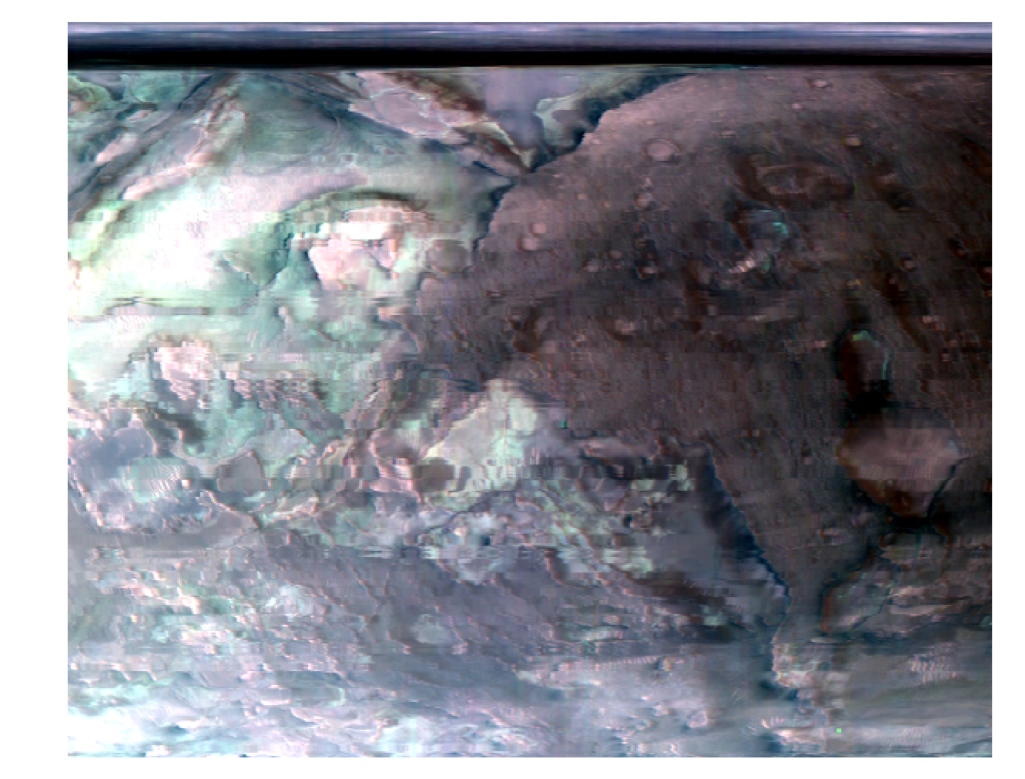

In [42]:
#mark super-pixel boundaries over the FCC and display it
plt.figure(dpi=200)
plt.imshow(fcc)
plt.axis('off')
plt.margins(0)

In [43]:
#import convex hull removal from pysptools
from pysptools.spectro import convex_hull_removal

In [44]:
#create a copy of the fcc
fccCopy=np.copy(fcc)

In [45]:
#set a threshold to identify flat spectra
#if minimum reflectance, for a spectrum after continuum removal, is > this threshold, it is considered a flat/unremarkable spectrum and ignored during further processing
flatSpectraThreshold=0.98

In [46]:
#preprocess the datacube for super-pixel segmentation
continumRemovedCube=np.full_like(imageLevelDespikedCube,-1e1)
normalizedContinuumRemovedCube=np.full_like(imageLevelDespikedCube,-1e1)
#set all out of scene pixels equal to -10^10 and normalize each in-scene pixel after removing its continuum
for j in tqdm(range(imageLevelDespikedCube.shape[1])):
    for i in range(imageLevelDespikedCube.shape[0]):
        #ignore out of scene pixels
        if np.all(imageLevelDespikedCube[i,j,:]==imageLevelDespikedCube[i,j,0]):
            pass
        else:
            #remove the continuum
            continumRemovedCube[i,j,:]=convex_hull_removal(imageLevelDespikedCube[i,j,:],wavelengthList)[0]
            #noramlize the spectrum
            normalizedContinuumRemovedCube[i,j,:]=continumRemovedCube[i,j,:]/np.linalg.norm(continumRemovedCube[i,j,:]) 

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [17:01<00:00,  1.60s/it]


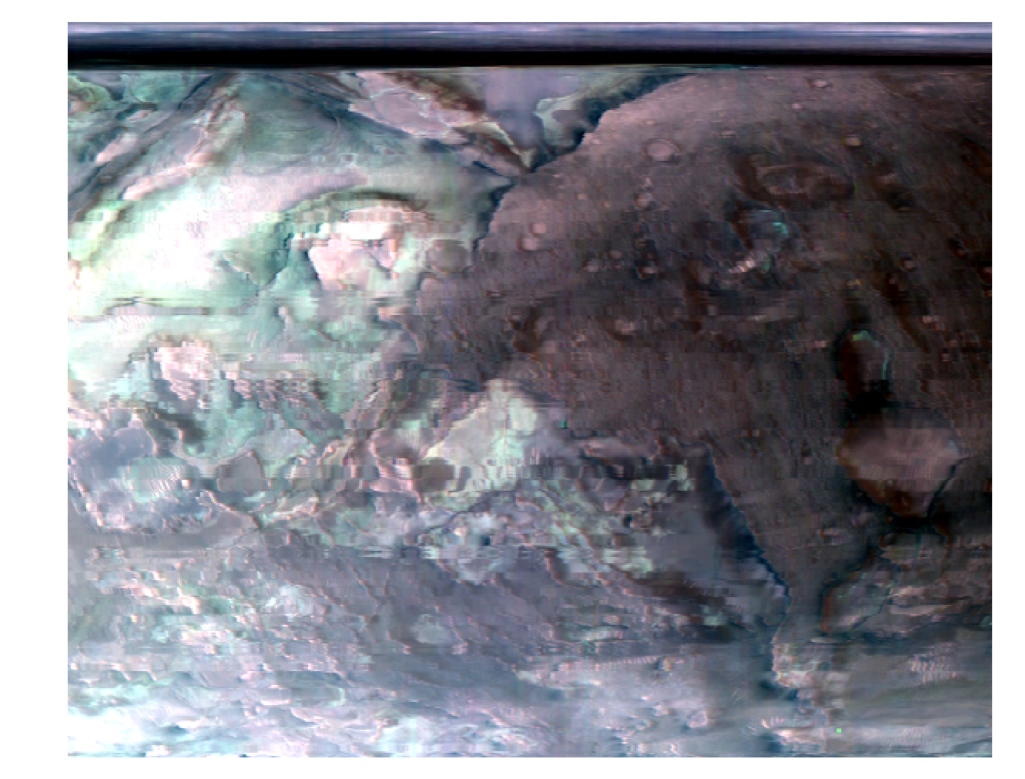

In [54]:
#mark super-pixel boundaries over the FCC and display it
plt.figure(dpi=200)
plt.imshow(fcc)
plt.axis('off')
plt.margins(0)

In [55]:
#import felzenszwalb from skimage
from skimage.segmentation import felzenszwalb,mark_boundaries

In [56]:
#compute the segmentation map for the image
superPixelMap=felzenszwalb(normalizedContinuumRemovedCube,
                           scale=0.01,
                           sigma=0,
                           min_size=3,
                           channel_axis=-1)

C:\Users\sandy\AppData\Local\Temp\ipykernel_4048\3220063223.py:2: RuntimeWarning: Got image with third dimension of 236. This image will be interpreted as a multichannel 2d image, which may not be intended.
  superPixelMap=felzenszwalb(normalizedContinuumRemovedCube,


In [57]:
np.unique(superPixelMap).shape

(47226,)

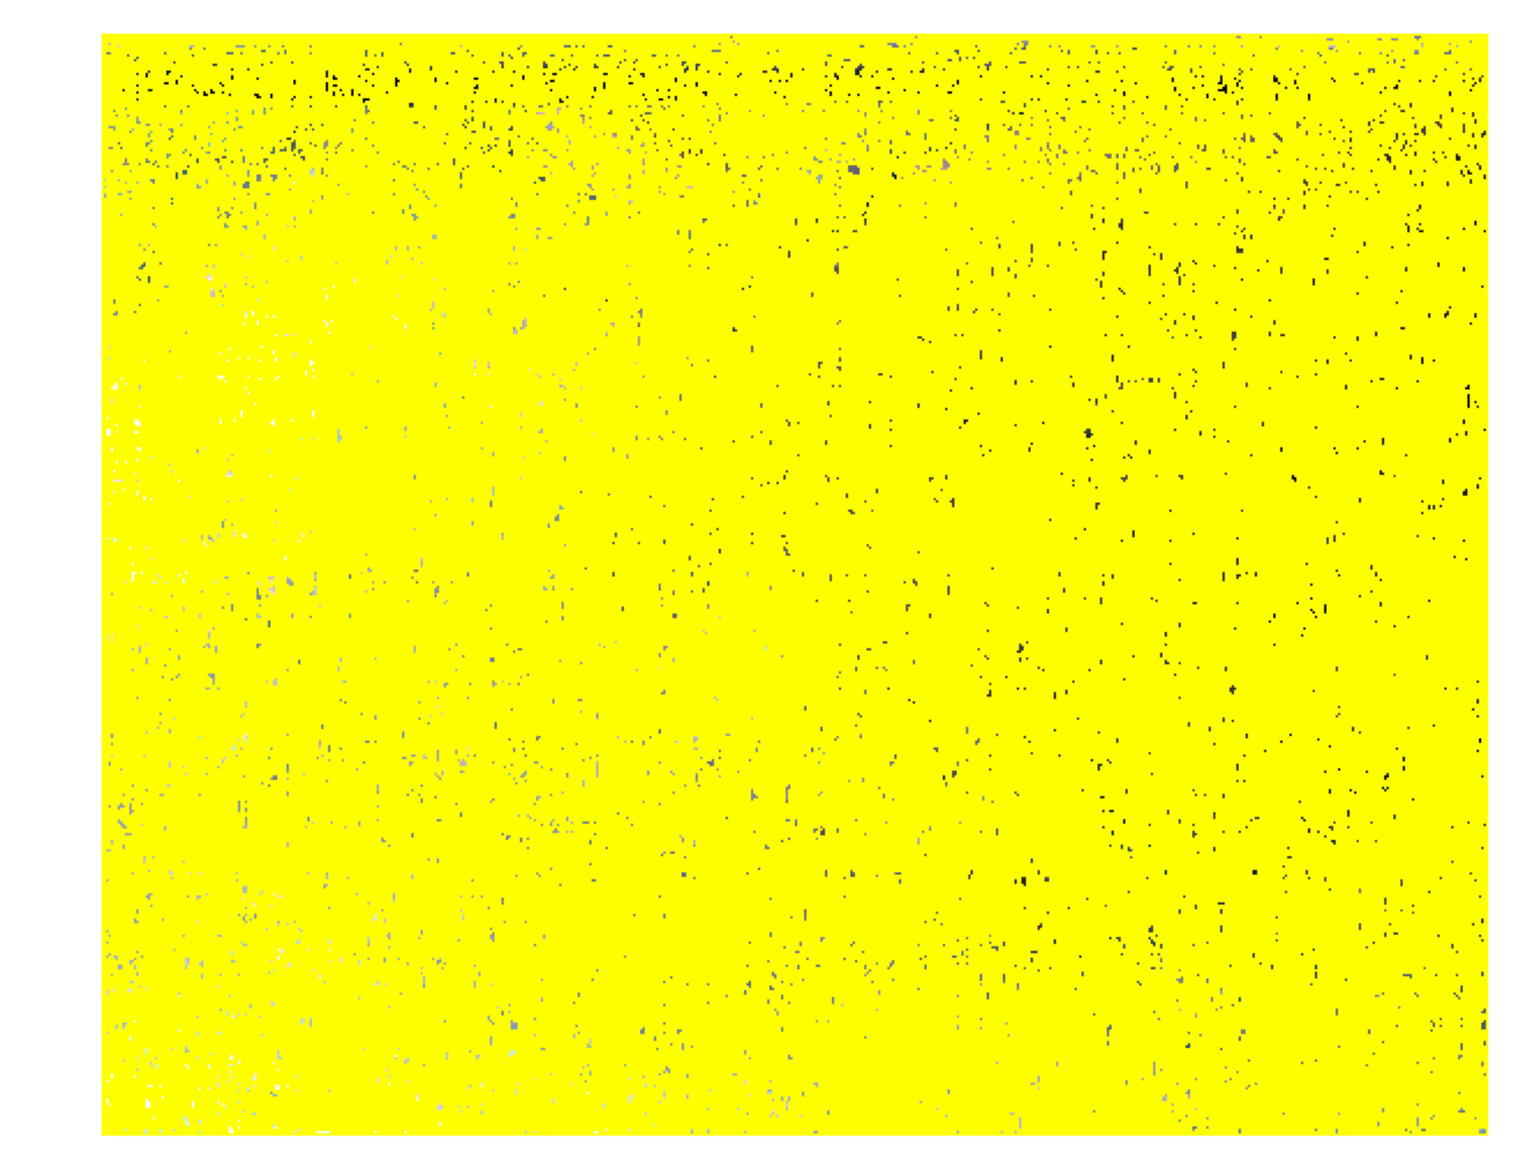

In [58]:
#mark super-pixel boundaries over the FCC and display it
plt.figure(dpi=300)
plt.imshow(mark_boundaries(fcc,
                           superPixelMap,
                           color=(255,255,0),
                           mode='inner')
          )
plt.axis('off')
plt.margins(0.01)

In [60]:
#create lists to hold the row columns and mediod spectra for each super-pixel
superPixelRowsIndices=[]
superPixelColsIndices=[]
superPixelAvgRowIndices=[]
superPixelAvgColIndices=[]
superPixelMeanSpectra=[]
superPixelRepresentativeSpectra=[]

In [61]:
#iterate through all super-pixels and replace each pixel's spectra by the mean, continuum removed, and then normalized spectra of the super-pixel it falls in
for k in tqdm(np.unique(superPixelMap)):
    #get the indices of all pixel that constitute the current super-pixel
    currentSuperPixelRowIndices=np.where(superPixelMap==k)[0]
    currentSuperPixelColIndices=np.where(superPixelMap==k)[1]
    currentAvgRowIndices=[]
    currentAvgColIndices=[]
     #check if a super-pixel lies entirely in a single column and is longer than ten pixels
    if np.all(currentSuperPixelColIndices==currentSuperPixelColIndices[0]) and currentSuperPixelColIndices.shape[0]>=5:
        fccCopy[currentSuperPixelRowIndices,currentSuperPixelColIndices,:]=[255,255,255]
    else:
        #collect non-flat spectra in an array
        currentSuperPixelSpectra=[]
        for i,j in zip(currentSuperPixelRowIndices,currentSuperPixelColIndices):
            if np.amin(continumRemovedCube[i,j,:])<0.98 and np.amin(continumRemovedCube[i,j,:])>0 and np.any(continumRemovedCube[i,j,:]!=continumRemovedCube[i,j,0]):
                currentSuperPixelSpectra.append((imageLevelDespikedCube[i,j,:]-np.amin(imageLevelDespikedCube[i,j,:]))/np.ptp(imageLevelDespikedCube[i,j,:])) 
                currentAvgRowIndices.append(i)
                currentAvgColIndices.append(j)
            
        #if the number of non flat spectra in the super-pixel is greater than a third of the total number of pixels in the super-pixel then process the super-pixel, else ignore it
        if len(currentSuperPixelSpectra)>currentSuperPixelRowIndices.shape[0]//3:
            #compute mean spectra for the super-pixel
            superPixelSpectrum=np.mean(np.vstack(currentSuperPixelSpectra),axis=0)

            #remove the continuum from the super-pixel spectrum
            continuumRemovedSpectrum=convex_hull_removal(superPixelSpectrum,wavelengthList)[0]

            
            #normalize the enhanced super-pixel spectra
            continuumRemovedSpectrum=continuumRemovedSpectrum/np.linalg.norm(continuumRemovedSpectrum)

            superPixelRowsIndices.append(currentSuperPixelRowIndices)
            superPixelColsIndices.append(currentSuperPixelColIndices)
            superPixelRepresentativeSpectra.append(continuumRemovedSpectrum)
            superPixelMeanSpectra.append(superPixelSpectrum)
            superPixelAvgRowIndices.append(currentAvgRowIndices)
            superPixelAvgColIndices.append(currentAvgColIndices)
        else:
            fccCopy[currentSuperPixelRowIndices,currentSuperPixelColIndices,:]=[255,255,255]

100%|███████████████████████████████████████████████████████████████████████████| 47226/47226 [03:04<00:00, 256.06it/s]


In [62]:
#convert list of pixel spectra into a 2D array
superPixelRepresentativeSpectra=np.vstack(superPixelRepresentativeSpectra)
superPixelMeanSpectra=np.vstack(superPixelMeanSpectra)

In [63]:
superPixelRepresentativeSpectra.shape

(28633, 236)

In [64]:
superPixelMeanSpectra.shape

(28633, 236)

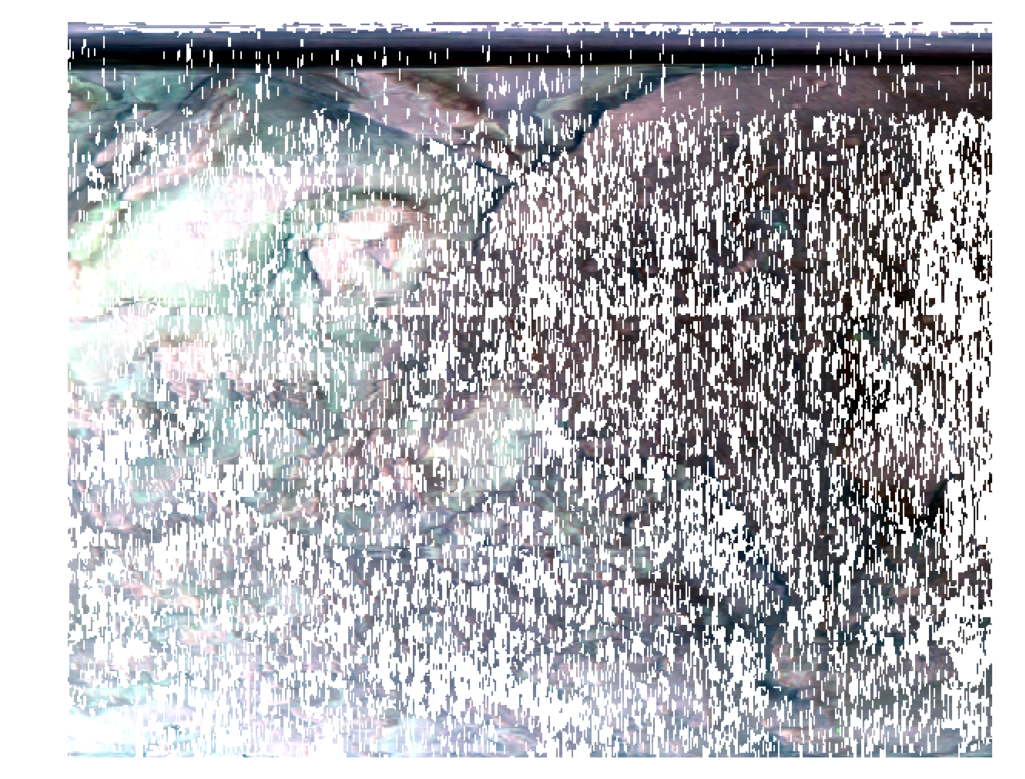

In [65]:
#mark super-pixel boundaries over the FCC and display it
plt.figure(dpi=200)
plt.imshow(fccCopy)
plt.axis('off')
plt.margins(0)

In [66]:
#set the address of the file containing the trained random forest classifier
randomForestAddress="D:/Mars/MachineLearning/topologicalClustering/openSetExperiments/trainedModels/RandomForest_FullDatasetTraining.joblib"

In [67]:
#import loader and saver from joblib
from joblib import dump,load
#load the RFC
classifier=load(randomForestAddress)

In [68]:
#predict probabilities for all super-pixels
predictedProbabilities=classifier.predict_proba(superPixelRepresentativeSpectra)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   15.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   32.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   59.4s
[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:  1.0min finished


In [69]:
#compute the labels, i.e. the class with the highest probability
predictedLabels=np.argmax(predictedProbabilities,axis=-1)

In [70]:
#discard all but the predicted labels probabilities
predictedProbabilities=predictedProbabilities[np.arange(predictedProbabilities.shape[0]),predictedLabels]

In [71]:
#set a probability threshold
probabilityThreshold=0.5

In [72]:
#apply the probability threshold and set the label for all super-pixels below the threshold to nan
predictedLabels=np.where(predictedProbabilities>probabilityThreshold,predictedLabels,np.nan)
predictedProbabilities=np.where(predictedProbabilities>probabilityThreshold,predictedProbabilities,np.nan)

In [73]:
#create arrays to hold the mineral map and probabilities
mineralMap=np.full((rowsInCube,colsInCube),np.nan)
probabilityMap=np.full((rowsInCube,colsInCube),np.nan)

In [74]:
#generate the mineral map
for i in range(len(superPixelRowsIndices)):
    mineralMap[superPixelRowsIndices[i],superPixelColsIndices[i]]=predictedLabels[i]
    probabilityMap[superPixelRowsIndices[i],superPixelColsIndices[i]]=predictedProbabilities[i]

In [75]:
#import square from skimage
from skimage.morphology import square

#define the footprint of the structuring element for closing
structuringElement=square(3)

In [76]:
#create a list contatining the labels of the minerals detected in the image
uniqueMapLabels=np.sort(np.unique(mineralMap)[:-1].astype('int32')).tolist()

In [77]:
#create a numpy array which will hold the class-wise maps (arranged in ascending order of labels)
classWiseMaps=np.full((mineralMap.shape[0],
                       mineralMap.shape[1],
                       len(uniqueMapLabels)),0).astype('float32')
#create a numpy array which will hold the class-wise probability maps (arragned in ascending order of labels)
classWiseProbabilityMaps=np.full((mineralMap.shape[0],
                                  mineralMap.shape[1],
                                  len(uniqueMapLabels)),np.nan).astype('float32')
#create an array to hold class-wise maps after applying spatial constraints
spatiallyConstraintedClasswiseMaps=np.full_like(classWiseMaps,np.nan)
#create an array to hold class-wise probability maps after applying spatial constraints
spatiallyConstraintedClasswiseProbabilityMaps=np.full_like(classWiseMaps,np.nan)

In [78]:
#import closing from sklearn
from skimage.morphology import binary_closing

In [79]:
#iterate through all the classes and apply spatial constraints and estimate probabilities (closed-set for) the pixels introduced by the 
for k in tqdm(range(len(uniqueMapLabels))):
    #get the indices of having the current label
    currentLabelRowIndices,currentLabelColIndices=np.where(mineralMap==uniqueMapLabels[k])
    #save probabilities of the original detections to the final probability map
    classWiseProbabilityMaps[currentLabelRowIndices,currentLabelColIndices,k]=probabilityMap[currentLabelRowIndices,currentLabelColIndices]

    #populate the indices having the current map labels
    classWiseMaps[currentLabelRowIndices,currentLabelColIndices,k]=1
    #apply closing to the current class image
    spatiallyConstraintedClasswiseMaps[:,:,k]=binary_closing(classWiseMaps[:,:,k],footprint=structuringElement)
    
    #set probability of any removed detections to nan
    spatiallyConstraintedClasswiseProbabilityMaps[:,:,k]=np.where(np.logical_and(spatiallyConstraintedClasswiseMaps[:,:,k]==0,classWiseMaps[:,:,k]==1),np.nan,classWiseProbabilityMaps[:,:,k])
    
    #get indices of the new detections
    currentLabelRowIndices,currentLabelColIndices=np.where(np.logical_and(spatiallyConstraintedClasswiseMaps[:,:,k]==1,classWiseMaps[:,:,k]==1))
    
    
    #iterate through all the pixels introduced by spatial constraints
    for i,j in zip( currentLabelRowIndices,currentLabelColIndices):
        #get probability values in the 3x3 neighbourhood around the current pixel
        temp=classWiseProbabilityMaps[i-1:i+2,j-1:j+2,k][~np.isnan(spatiallyConstraintedClasswiseProbabilityMaps[i-1:i+2,j-1:j+2,k])]
        spatiallyConstraintedClasswiseProbabilityMaps[i,j,k]=np.median(temp)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.09it/s]


In [80]:
spatiallyConstrainedMineralMap=np.full((rowsInCube,colsInCube),np.nan)
spatiallyConstrainedProbabilityMap=np.full((rowsInCube,colsInCube),np.nan)

In [81]:
#iterate through all classes and merge the maps using probability thresholds to resolve conflicts
#i.e. if a pixel (after applying spatial constraints) belongs to two or more classes, assign it to the class with the highest probability
for i in tqdm(range(len(uniqueMapLabels))):
    #label pixel which have no labels so far, but belong to the current class
    spatiallyConstrainedMineralMap=np.where(np.logical_and(np.isnan(spatiallyConstrainedProbabilityMap),~np.isnan(spatiallyConstraintedClasswiseProbabilityMaps[:,:,i])),
                                            uniqueMapLabels[i],spatiallyConstrainedMineralMap)
    spatiallyConstrainedProbabilityMap=np.where(np.logical_and(np.isnan(spatiallyConstrainedProbabilityMap),~np.isnan(spatiallyConstraintedClasswiseProbabilityMaps[:,:,i])),
                                                spatiallyConstraintedClasswiseProbabilityMaps[:,:,i],spatiallyConstrainedProbabilityMap)
    
    #check compare probabilities of pixels which already have a label and are assigned the current class
    rowIndices,colIndices=np.where(np.logical_and(~np.isnan(spatiallyConstrainedProbabilityMap),~np.isnan(spatiallyConstraintedClasswiseProbabilityMaps[:,:,i])))
    
    spatiallyConstrainedMineralMap[rowIndices,colIndices]=np.where(spatiallyConstraintedClasswiseProbabilityMaps[:,:,i][rowIndices,colIndices]>spatiallyConstrainedProbabilityMap[rowIndices,colIndices],
                                                                   uniqueMapLabels[i],
                                                                   spatiallyConstrainedMineralMap[rowIndices,colIndices])
    
    spatiallyConstrainedProbabilityMap[rowIndices,colIndices]=np.where(spatiallyConstraintedClasswiseProbabilityMaps[:,:,i][rowIndices,colIndices]>spatiallyConstrainedProbabilityMap[rowIndices,colIndices],
                                                                       spatiallyConstraintedClasswiseProbabilityMaps[:,:,i][rowIndices,colIndices],
                                                                       spatiallyConstrainedProbabilityMap[rowIndices,colIndices])

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.17it/s]


In [82]:
#import gdal
from osgeo import gdal

In [83]:
#read the trdr file
outputFile=gdal.Open(outputfileAddress,gdal.GA_Update)

In [84]:
#write the closed set output
currentBand=outputFile.GetRasterBand(1)
flag=currentBand.WriteArray(spatiallyConstrainedMineralMap)
print(flag)
currentBand.FlushCache()
currentBand=None

0


In [85]:
#ensure the data is saved by flushing the denoised file from the cache
outputFile.FlushCache()
outputFile=None

In [86]:
predictedLabels.shape

(28633,)

In [87]:
#print the labels of the minerals detectedin the current image
np.unique(predictedLabels)

array([ 0.,  2.,  8., 10., 14., 15., 16., 19., nan])

In [101]:
#set which minerals spectra are to be retrieved
currentMineralLabel=14

In [102]:
#print the name of the mineral
print(mineralNames[currentMineralLabel])

Mg-Carbonate


In [103]:
#get indices of superpixels having the current mineral
currentMineralIndices=np.where(predictedLabels==currentMineralLabel)[0]

In [104]:
currentMineralIndices.shape

(225,)

4313
[55, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62] [169, 170, 171, 169, 170, 169, 170, 169, 170, 169, 170, 169, 170, 169, 170, 169, 170]


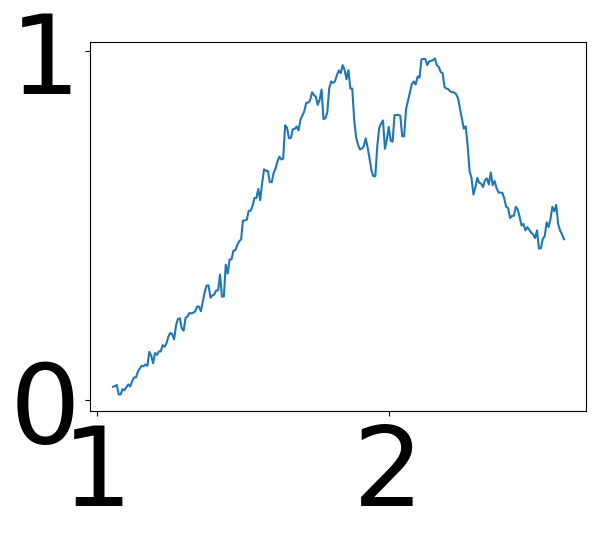

In [150]:
#retrieve a spectra belonging to the current class at random,print its pixel indices and plot it
randomIndex=np.random.choice(currentMineralIndices,size=1,replace=False)[0]
print(randomIndex)
print(superPixelAvgRowIndices[randomIndex],superPixelAvgColIndices[randomIndex])
#plt.plot(wavelengthList,superPixelTERMeanSpectra[randomIndex,:])
plt.plot(wavelengthList,superPixelMeanSpectra[randomIndex,:])

In [151]:
#create a dictionary conataining class labels and indices of super-pixels whose spectra are to be plotted for it
allClassExemplarIndices={
    14:[4123,4223,4313]  
}

In [152]:
#import rcParams from matplotlib
from matplotlib import rcParams
#import matplotlib
import matplotlib as mpl
from pathlib import Path
#set path to desired font
fontFileAddress="D:/Mars/MachineLearning/topologicalClustering/utilities/EBGaramond-VariableFont_wght.ttf"
fpath=Path(mpl.get_data_path(),fontFileAddress)

In [153]:
#read the MICA exemplars
micaExemplars=np.load("D:/Mars/MachineLearning/Datasets/micaExemplars.npy")

In [154]:
#import pickle to save the detection details
import pickle

In [155]:
#load the band centres for the MICA exemplars
with open("D:/Mars/MachineLearning/Datasets/micaBandCentres.pkl",'rb') as f:
    diagnosticBandCentres=pickle.load(f)

In [156]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 80})

14


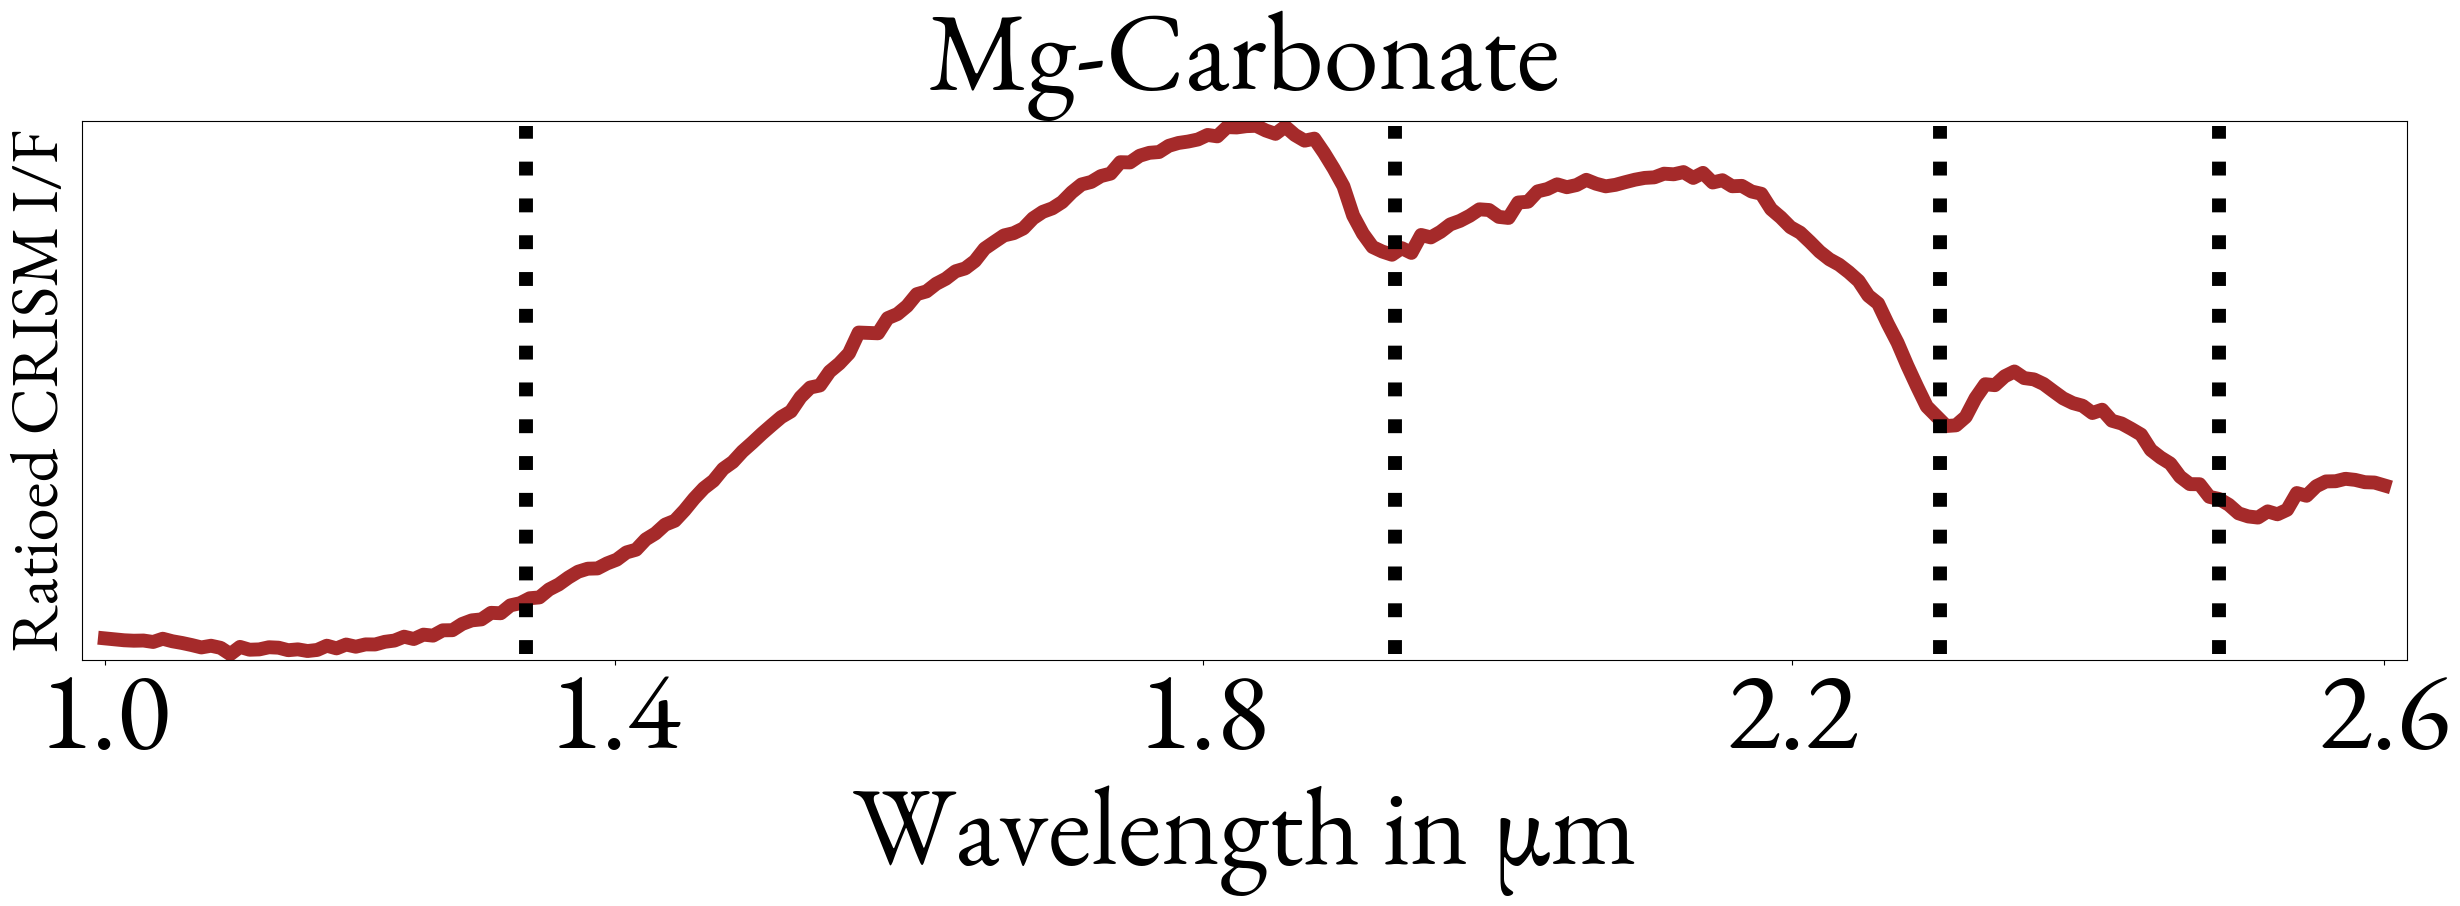

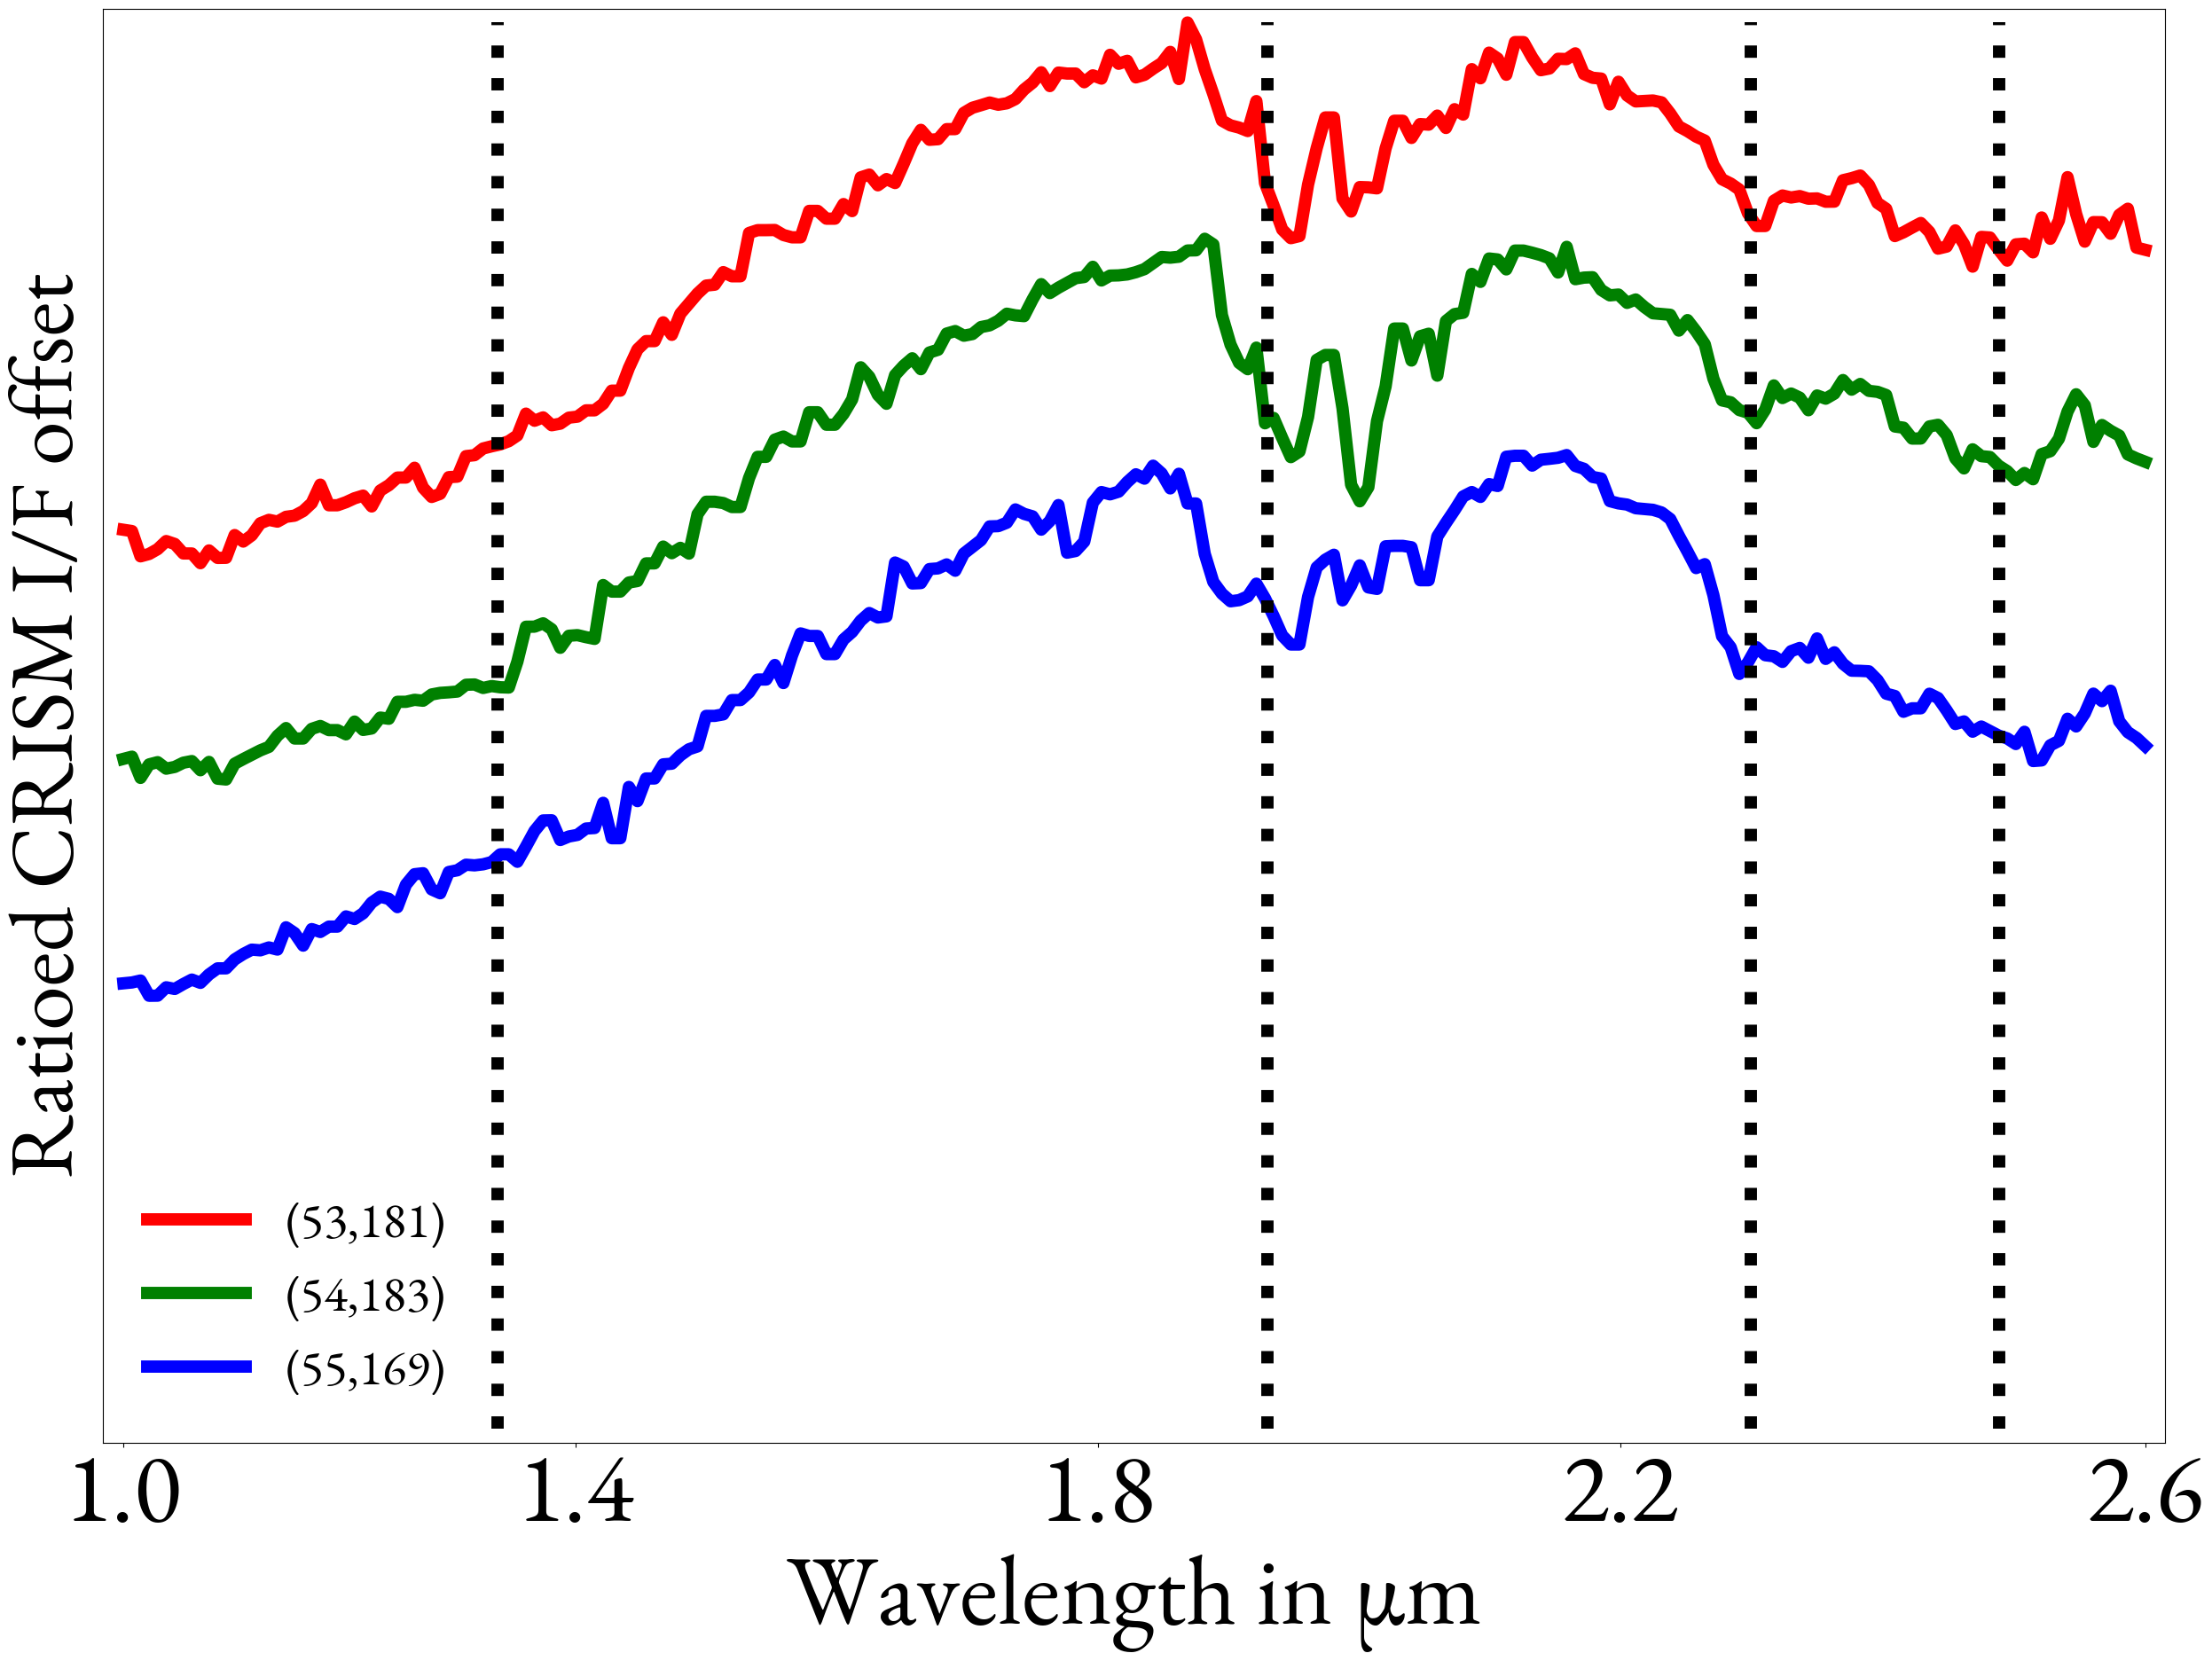

In [157]:
#iterate through all the minerals in the final map
for i in allClassExemplarIndices:
    print(i)
    #get the exemplarIndices
    exemplarIndices=allClassExemplarIndices[i]
    
    #get the spectra of the units with the highest probabilities
    #representativeSpectra=superPixelTERMeanSpectra[exemplarIndices,:]
    representativeSpectra=superPixelMeanSpectra[exemplarIndices,:]
    #scale spectra between 0 and 1
    for j in range(representativeSpectra.shape[0]):
        representativeSpectra[j,:]=(representativeSpectra[j,:]-np.amin(representativeSpectra[j,:]))/np.ptp(representativeSpectra[j,:])
    #get row and column indices
    rowIndices=[]
    colIndices=[]
    for j in exemplarIndices:
        rowIndices.append(superPixelAvgRowIndices[j][0])
        colIndices.append(superPixelAvgColIndices[j][0])
    #plot the spectra
    generateSHAPPlotWithBandCentre(representativeSpectra,i,diagnosticBandCentres[i],rowIndices,colIndices)
    

In [ ]:
#define a function to generate SHAP plot given spectra,shap values, className and position of the absorption band centre
def PlotSpectra(currentClassMeanSpectra,currentClassName):
    #get the wavelength list
    global wavelengthList
      
    
    
    #import pyplot from matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import matplotlib.colors as colors
    #set plot parameters
    plotHeight=5
    plotWidth=10
    mineralTitleFontsize=30
    axisLabelFontsize=30
    wavlengthTicksFontSize=24
    lineWidth=20

    #set the size of the titles for each plot
    titleSize=80
    labelSize=80
    legendSize=10
    tickLabelSize=60

    #set the tick labels for the wavelengths labels for the samples spectra plots
    wavlengthTickLabels=[1.0,1.4,1.8,2.2,2.6]
    #set the tick positions for the wavelength labels
    wavelengthTickPositions=np.copy(wavlengthTickLabels)
    wavelengthTickPositions[0]=wavelengthList[0]
    wavelengthTickPositions[-1]=wavelengthList[-1]


    #create the figure
    figure,axes=plt.subplots(nrows=1,
                             ncols=1,
                             figsize=(30,15),
                             dpi=100)

    #turn the axis on
    axes.axis('on')

    #get the number of the sub-plot where the spectra is to be mapped
    plotNumber=i

    
    #plot the spectra
    axes.plot(wavelengthList,
              currentClassMeanSpectra,
              lw=lineWidth,
              color='navy')


    #set the y-ticks off for all plots
    [t.set_visible(True) for t in axes.get_yticklabels()]


    #add the name of the mineral class to the title of the plot
    axes.set_title(currentClassName,
                   fontsize=titleSize)


     # set the y-axis label
    axes.set_ylabel("Ratioed CRISM I/F",fontsize=labelSize)


    #get the tick positions for the y-axis
    yTickPositions=np.array([np.amin(currentClassMeanSpectra),np.amax(currentClassMeanSpectra)])

    #get the tick labels for the y-axis
    yTickLabels=np.round(yTickPositions,3)

    #set ticks for the y-axis
    axes.set_yticks(yTickPositions,
                    labels=yTickLabels,
                    fontsize=labelSize)

    # set the x-axis label and wavelength ticks
    axes.set_xlabel("Wavelength in μm",fontsize=labelSize)

    #set ticks for the x-axis
    axes.set_xticks(wavelengthTickPositions,
                    labels=wavlengthTickLabels,
                    fontsize=labelSize)
    
    #set the margin
    axes.margins(0.02)

In [ ]:
PlotSpectra(superPixelMeanSpectra[9740,:],'')